In [236]:
# import Beautiufl soup and get the page using requests

from bs4 import BeautifulSoup as bs
import requests

r = requests.get("https://www.goodreads.com/list/show/1582.Books_Every_Human_Being_Should_Read")

soup = bs(r.content)

contents = soup.prettify()
print(contents)

<!DOCTYPE html>
<html class="desktop">
 <head>
  <title>
   Books Every Human Being Should Read (1648 books)
  </title>
  <meta content="1,648 books based on 1224 votes: To Kill a Mockingbird by Harper Lee, Animal Farm by George Orwell, 1984 by George Orwell, Pride and Prejudice by Jane Au..." name="description"/>
  <meta content="telephone=no" name="format-detection"/>
  <link href="https://www.goodreads.com/list/show/1582.Books_Every_Human_Being_Should_Read" rel="canonical"/>
  <script type="text/javascript">
   var ue_t0=window.ue_t0||+new Date();
  </script>
  <script type="text/javascript">
   var ue_mid = "A1PQBFHBHS6YH1";
    var ue_sn = "www.goodreads.com";
    var ue_furl = "fls-na.amazon.com";
    var ue_sid = "129-5386740-3015310";
    var ue_id = "1616FHHT1A0FGVFEX3NY";

    (function(e){var c=e;var a=c.ue||{};a.main_scope="mainscopecsm";a.q=[];a.t0=c.ue_t0||+new Date();a.d=g;function g(h){return +new Date()-(h?0:a.t0)}function d(h){return function(){a.q.push({n:h,a:argumen

#### Scrape the relevant movie info and iterate through the various pages

In [237]:
info_box = soup.find(class_='tableList js-dataTooltip')
info_rows = info_box.find_all("tr")

def get_movie_info(row):

    movie_info = {}
    movie_info['Title'] = row.find("span", attrs={"aria-level":"4"}).get_text()
    movie_info['Author'] = row.find("a", attrs={"class": "authorName"}).get_text()
    movie_info['Rating'] = row.find("span", attrs={"class": "minirating"}).get_text()
    movie_info['Score'] = row.find("a", attrs={"href": "#"}).get_text()
    

    return movie_info

def get_other_pages(url):
    r = requests.get(url)
    soup = bs(r.content)
    info_box = soup.find(class_='tableList js-dataTooltip')
    info_rows = info_box.find_all("tr")
    for movie in info_rows:
        movie_info_list.append(get_movie_info(movie))

In [238]:
movie_info_list = []

for movie in info_rows:
        movie_info_list.append(get_movie_info(movie))
    

In [239]:
base_url = 'https://www.goodreads.com/list/show/1582.Books_Every_Human_Being_Should_Read?page='

pages = []

for i in range(2,18):
    url = base_url + str(i)
    pages.append(url)

[get_other_pages(x) for x in pages]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

#### Import Pandas and load the movies into a dataframe for analysis

In [240]:
import pandas as pd 

df = pd.DataFrame(movie_info_list)

df.shape

(1648, 4)

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648 entries, 0 to 1647
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   1648 non-null   object
 1   Author  1648 non-null   object
 2   Rating  1648 non-null   object
 3   Score   1648 non-null   object
dtypes: object(4)
memory usage: 51.6+ KB


In [242]:
df.head()

# Score: "A book’s total score is based on multiple factors, including the number of people who have voted for it and how highly
# those voters ranked the book"

,Title,Author,Rating,Score
0,To Kill a Mockingbird,Harper Lee,"4.27 avg rating — 5,140,383 ratings","score: 12,155"
1,Animal Farm,George Orwell,"3.97 avg rating — 3,173,880 ratings","score: 9,490"
2,1984,George Orwell,"4.19 avg rating — 3,700,036 ratings","score: 9,019"
3,Pride and Prejudice,Jane Austen,"4.28 avg rating — 3,494,735 ratings","score: 8,174"
4,The Diary of a Young Girl,Anne Frank,"4.17 avg rating — 3,160,893 ratings","score: 7,357"


#### Clean the data and the columns to the correct data type

In [243]:
df[['Average Rating', 'No. Ratings']] = df['Rating'].str.split('—', 0, expand=True)
df.drop(columns='Rating', inplace=True)

In [244]:
df['Average Rating'] = df['Average Rating'].str.rstrip("avg rating")
df['Average Rating'] = df['Average Rating'].str.replace(r"[a-zA-Z]",'')
df['Average Rating'] = pd.to_numeric(df['Average Rating'])
df['Average Rating']

0       4.27
1       3.97
2       4.19
3       4.28
4       4.17
        ... 
1643    4.13
1644    4.00
1645    4.13
1646    4.27
1647    4.11
Name: Average Rating, Length: 1648, dtype: float64

In [245]:
df['No. Ratings'] = df['No. Ratings'].str.lstrip().str.rstrip()
df['No. Ratings'] = df['No. Ratings'].str.replace(r"[a-zA-Z]",'')
df['No. Ratings'] = df['No. Ratings'].str.replace(",","")                                      
df['No. Ratings'] = pd.to_numeric(df['No. Ratings'])
df['No. Ratings']

0       5140383
1       3173880
2       3700036
3       3494735
4       3160893
         ...   
1643     322042
1644         14
1645       1395
1646        164
1647       3435
Name: No. Ratings, Length: 1648, dtype: int64

In [246]:
df['Score'] = df['Score'].str.lstrip("score:")
df['Score'] = df['Score'].str.lstrip()
df['Score'] = df['Score'].str.replace(r"[a-zA-Z]",'')
df['Score'] = df['Score'].str.replace(",","")                                      
df['Score'] = pd.to_numeric(df['Score'])
df['Score']

0       12155
1        9490
2        9019
3        8174
4        7357
        ...  
1643        1
1644        0
1645        0
1646        0
1647        0
Name: Score, Length: 1648, dtype: int64

In [247]:
df.head()

,Title,Author,Score,Average Rating,No. Ratings
0,To Kill a Mockingbird,Harper Lee,12155,4.27,5140383
1,Animal Farm,George Orwell,9490,3.97,3173880
2,1984,George Orwell,9019,4.19,3700036
3,Pride and Prejudice,Jane Austen,8174,4.28,3494735
4,The Diary of a Young Girl,Anne Frank,7357,4.17,3160893


#### Analyse the data

In [248]:
df[['Average Rating', 'Score', 'No. Ratings']].corr()

# strange that there is almost no correlation between the average rating and the score.


,Average Rating,Score,No. Ratings
Average Rating,1.000000,0.013840,0.022168
Score,0.013840,1.000000,0.645798
No. Ratings,0.022168,0.645798,1.000000


In [249]:
author_rating_mean = df.groupby('Author')['Average Rating'].mean()
print(author_rating_mean.sort_values(ascending=False).head(30))

# Look at highest rated authors by average rating
# Seem to be authors I have never heard of 

Author
J. Rutledge               5.00
G.A.A. Kent               5.00
Jillian Hishaw            5.00
Fred F. Hollingsworth     5.00
Katharine L. Oldmeadow    5.00
Emily Pearson             5.00
Khefa Nosakhere           5.00
Kseniya Wolkowicz         5.00
Harun German              5.00
Amma Droyd                5.00
Steve  Powell             5.00
Anne  Murray              5.00
David  Perlmutter         5.00
Sam Beach                 5.00
Marya Waifoon Schwabe     5.00
P.J. Daniels              5.00
P. Pena                   5.00
Cristina G.               5.00
Alexis Anicque            5.00
Thomas Pryce              5.00
Michael Collins           5.00
Cecília Vizvári           5.00
Nelson Gomez Coelho       5.00
Mustafa Gedik             5.00
Neil Hummasti             5.00
Carl S. Armato            5.00
Gavin Ford                5.00
C.L.  Ross                4.97
Jaclyn Howell             4.93
Dezi Shepperd             4.91
Name: Average Rating, dtype: float64


In [250]:
df.sort_values('Average Rating', ascending=False)[:30]

# Most of these authors have very few ratings.  Not enough sample size for reliable avg. rating

,Title,Author,Score,Average Rating,No. Ratings
1152,"Blood, Blood Everywhere (Nicu: The Littlest Va...",Elias Zapple,97,5.0,14
812,The Space Pot,Cecília Vizvári,168,5.0,4
1516,Ragged Robin,Katharine L. Oldmeadow,53,5.0,1
662,The Accursed Art,J. Rutledge,284,5.0,3
668,ONE (Sydney Jones Series #3),Carolyn M. Bowen,279,5.0,13
1384,Peter Pants: who lives each day down to its dr...,Anne Murray,80,5.0,2
1036,I Believe You,Emily Pearson,100,5.0,2
1396,Move Over Shakespeare Tales From The Baron,Billy J. Barnum,78,5.0,4
1397,Unfathomable,Thomas Pryce,78,5.0,5
1210,Famous' Destiny The Monster In The Forest (Fam...,Alexis Anicque,96,5.0,9


In [251]:
# Remove those books which have below 5000 ratings

new_df = df[df['No. Ratings'] >= 5000]
new_df.sort_values('Average Rating', ascending=False)[:30]

,Title,Author,Score,Average Rating,No. Ratings
951,Annihilation of Caste,B.R. Ambedkar,100,4.62,5620
12,Harry Potter and the Deathly Hallows (Harry Po...,J.K. Rowling,4317,4.62,3174059
415,Just Mercy: A Story of Justice and Redemption,Bryan Stevenson,584,4.61,187444
621,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,322,4.60,120559
518,The Song of the Lioness Quartet (Song of the L...,Tamora Pierce,465,4.59,13529
1558,The Nightingale,Kristin Hannah,45,4.58,897187
20,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,3329,4.58,3331777
19,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,3351,4.57,2772310
14,Harry Potter and the Goblet of Fire (Harry Pot...,J.K. Rowling,3774,4.57,2982226
893,"The Wise Man's Fear (The Kingkiller Chronicle,...",Patrick Rothfuss,118,4.55,478169


In [252]:
grouped = new_df.groupby('Author')['Title'].count().sort_values(ascending=False)[:20]
grouped

# Authors with the most books in this list 

Author
Charlaine Harris            14
Bill Bryson                 12
J.K. Rowling                 8
Jasper Fforde                8
William Shakespeare          7
James Patterson              6
J.R.R. Tolkien               6
Terry Pratchett              6
David Sedaris                6
Margaret Atwood              5
Michael Pollan               5
Neil Gaiman                  5
Toni Morrison                5
Fyodor Dostoevsky            5
Malcolm Gladwell             5
Michael   Lewis              5
George Orwell                4
Chimamanda Ngozi Adichie     4
Thomas Mann                  4
Oliver Sacks                 4
Name: Title, dtype: int64

In [253]:
# Have a look at the most popular authors

df.loc[df['Author'].isin(['Bill Bryson', 'Charlaine Harris', 'J.K. Rowling', 'Jasper Fforde'])]

# Quite a large discrepancy between these authors in terms of score with Harry Potter books ranking very highly.   
# Worth noting that the only non-Harry potter book by JK Rowling is rated lower than most of Bill Bryson's books

,Title,Author,Score,Average Rating,No. Ratings
9,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,5173,4.48,8260914
12,Harry Potter and the Deathly Hallows (Harry Po...,J.K. Rowling,4317,4.62,3174059
14,Harry Potter and the Goblet of Fire (Harry Pot...,J.K. Rowling,3774,4.57,2982226
17,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,3462,4.50,2861600
18,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,3360,4.43,3183567
19,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,3351,4.57,2772310
20,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,3329,4.58,3331777
101,The Mother Tongue: English and How It Got That...,Bill Bryson,1114,3.91,38720
115,Notes from a Small Island,Bill Bryson,1045,3.91,104247
132,Neither Here nor There: Travels in Europe,Bill Bryson,1002,3.85,69044


<AxesSubplot:>

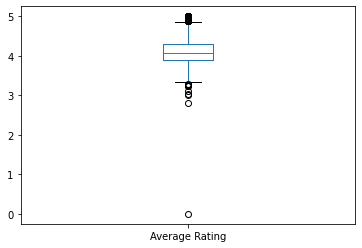

In [254]:
df['Average Rating'].plot(kind='box')

In [255]:
df[df['Average Rating'] <= 2] 
# 1 outlier with 0 average score, no ratings on Goodreads.  A book about the school shooting at Parkland.  I will drop this

,Title,Author,Score,Average Rating,No. Ratings
966,Post-Parkland: Are We Missing the Mark?,Adam Salomon,100,0.0,0


In [256]:
df.drop(972, inplace=True)

<AxesSubplot:xlabel='Score', ylabel='No. Ratings'>

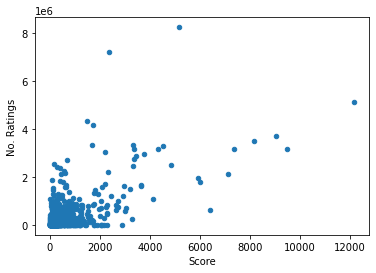

In [257]:
df.plot(x='Score', y='No. Ratings', kind='scatter')

# The scatterplot shows that 'To Kill A Mockingbird' is way out on its own as the book every human should read


In [258]:
df.sort_values('No. Ratings', ascending=False)
# Harry Potter, The Hunger Games and The Fault in our stars are all in the top 5 for No. of Ratings
# Might indicate that there are a lot of young adults or teenagers on Goodreads

,Title,Author,Score,Average Rating,No. Ratings
9,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,5173,4.48,8260914
35,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,2364,4.32,7207467
0,To Kill a Mockingbird,Harper Lee,12155,4.27,5140383
75,The Great Gatsby,F. Scott Fitzgerald,1483,3.93,4324877
62,The Fault in Our Stars,John Green,1726,4.17,4189639
...,...,...,...,...,...
1039,Runecentric: An inspirational handbook of rune...,Gavin Ford,100,5.00,1
1024,Turn Can't Into Next: Leadership,Gerry Cadorath,100,4.00,1
1050,Robotopia,Amma Droyd,100,5.00,1
1516,Ragged Robin,Katharine L. Oldmeadow,53,5.00,1


AxesSubplot(0.125,0.125;0.775x0.755)


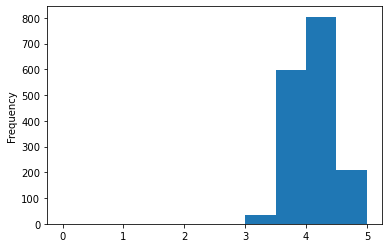

In [259]:
print(df['Average Rating'].plot(kind='hist'))
#Let's have a look how the average ratings are distributed in this list 